### Instalación 

In [93]:
!jupyter labextension install jupyterlab-plotly
!jupyter labextension list
!pip install plotly

'jupyter' is not recognized as an internal or external command,
operable program or batch file.
'jupyter' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


### Librerias

In [94]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
import plotly as py
import plotly.graph_objects as go
import sklearn
from sklearn import datasets
from sklearn.decomposition import PCA

## Creación función LSH

In [95]:
def lsh(A, b):
    """ A: Matriz de (F,C).
        b: Cantidades de vectores a crear.
    """
    F, C = A.shape
    #n = b
  
  # Compute signature matrix

    M_vectors = np.random.randn(C, b) #Dudas
    R = A@M_vectors   #np.array([[sum(a*b for a,b in zip(A_row, vectors))/(np.linalg.norm(A_row)*np.linalg.norm(vectors)) for vectors in zip(*M_vectors)] for A_row in A])
    S = np.where(R>0, 1, 0)

    #S = np.split(S, 1, axis=1)  # dudas

    # column vector to convert binary vector to integer e.g. (1,0,1)->5
    binary_column = 2**np.arange(b).reshape(-1,  1)

    # convert each band into a single integer, 
    # i.e. convert band matrices to band columns
    S = np.hstack([M@binary_column for M in S])
    
    lsh_A = np.column_stack((A, S))

    return lsh_A

## Set Iris

In [96]:
from sklearn.datasets import load_iris
iris = load_iris()
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [97]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_iris_scaled = scalar.fit_transform(df_iris)

In [98]:
df_iris_scaled.shape

(150, 5)

In [99]:
Vectores = 2

In [100]:
iris_lsh = lsh(df_iris_scaled,Vectores)

In [101]:
print('Hiperplanos vectoriales:',2**Vectores)

Hiperplanos vectoriales: 4


In [102]:
np.unique(iris_lsh[:,-1])

array([0., 1., 2., 3.])

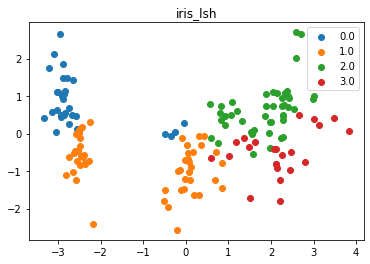

In [103]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import figure
import numpy as np
 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(iris_lsh)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object

 
#predict the labels of clusters.
label = iris_lsh[:,-1]
 
#Getting unique labels
u_labels = np.unique(iris_lsh[:,-1])
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.legend()
#plt.figure(figsize=(15,15))
plt.title('iris_lsh') 
plt.show()

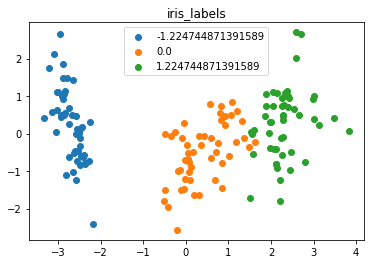

In [104]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import figure
import numpy as np
 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(iris_lsh)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object

 
#predict the labels of clusters.
label = iris_lsh[:,-2]
 
#Getting unique labels
u_labels = np.unique(iris_lsh[:,-2])
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.legend()
#plt.figure(figsize=(15,15))
plt.title('iris_labels') 
plt.show()

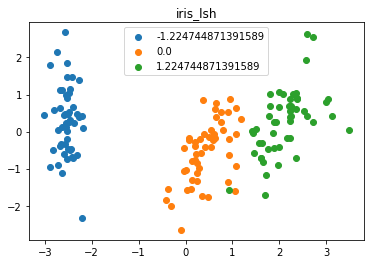

In [105]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import figure
import numpy as np
 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(df_iris_scaled)
 
#Import KMeans module
from sklearn.cluster import KMeans
 
#Initialize the class object

 
#predict the labels of clusters.
label = df_iris_scaled[:,-1]
 
#Getting unique labels
u_labels = np.unique(df_iris_scaled[:,-1])
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.legend()
#plt.figure(figsize=(15,15))
plt.title('iris_lsh') 
plt.show()

## fetch_california_housing

In [122]:
from sklearn.datasets import fetch_california_housing
cali = fetch_california_housing()
df_cali = pd.DataFrame(data= np.c_[cali['data'], cali['target']],
                     columns= cali['feature_names'] + ['target'])

df_cali.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [123]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
df_cali_scaled = scalar.fit_transform(df_cali)

In [124]:
df_cali_scaled.shape

(20640, 9)

In [125]:
Vectores = 5

In [126]:
cali_lsh = lsh(df_cali_scaled,Vectores)

In [127]:
print('Hiperplanos vectoriales:',2**Vectores)

Hiperplanos vectoriales: 32


In [128]:
np.unique(iris_lsh[:,-1])

array([0., 1., 2., 3.])

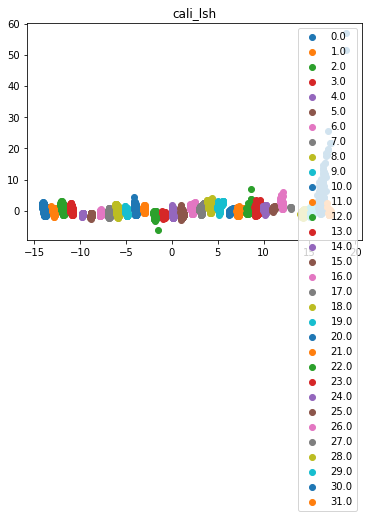

In [129]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import figure
import numpy as np
 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(cali_lsh)
 

#predict the labels of clusters.
label = cali_lsh[:,-1]
 
#Getting unique labels
u_labels = np.unique(cali_lsh[:,-1])
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.legend()
#plt.figure(figsize=(15,15))
plt.title('cali_lsh') 
plt.show()

## load_boston¶

In [130]:
from sklearn.datasets import load_boston
boston = load_boston()
df_boston = pd.DataFrame(data= np.c_[boston['data']],
                     columns= boston['feature_names'])

df_boston

c:\Users\L57759\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include th

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [131]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
boston_scaled = scalar.fit_transform(df_boston)

In [132]:
boston_scaled.shape

(506, 13)

In [133]:
Vectores = 4

In [134]:
boston_scaled_lsh = lsh(boston_scaled,Vectores)

In [135]:
print('Hiperplanos vectoriales:',2**Vectores)

Hiperplanos vectoriales: 16


In [136]:
np.unique(boston_scaled_lsh[:,-1])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15.])

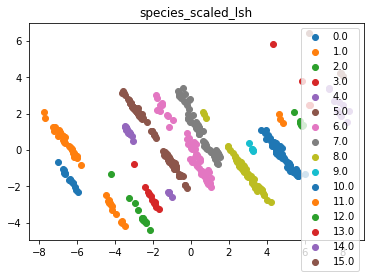

In [137]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib import figure
import numpy as np
 
#Load Data
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(boston_scaled_lsh)
 

#predict the labels of clusters.
label = boston_scaled_lsh[:,-1]
 
#Getting unique labels
u_labels = np.unique(boston_scaled_lsh[:,-1])
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)

plt.legend()
#plt.figure(figsize=(15,15))
plt.title('species_scaled_lsh') 
plt.show()